Import libraries

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import zipfile as zip
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from shutil import copyfile
import matplotlib.pyplot as plt
import numpy as np

TensorFlow 2.x selected.


Define constants

In [0]:
IMAGE_WIDTH=256
IMAGE_HEIGHT=256
IMAGE_CHANNELS=3
TRAIN_DATASET_PATH="/content/dogs-vs-cats/train"
TEST_DATASET_PATH="/content/dogs-vs-cats/test1"
BATCH_SIZE=32
MODEL_WEIGHTS_PATH="/content/drive/My Drive/Colab Notebooks/lab5_results/model.ckpt"

Copy zip-file

In [3]:
copyfile("/content/drive/My Drive/Colab Notebooks/storage/dogs-vs-cats.zip", "/content/dogs-vs-cats.zip")

'/content/dogs-vs-cats.zip'

Unzip file

In [0]:
with zip.ZipFile("/content/dogs-vs-cats.zip") as zip_file:
    zip_file.extractall("/content/dogs-vs-cats")

with zip.ZipFile("/content/dogs-vs-cats/train.zip") as zip_file:
    zip_file.extractall("/content/dogs-vs-cats/")

with zip.ZipFile("/content/dogs-vs-cats/test1.zip") as zip_file:
    zip_file.extractall("/content/dogs-vs-cats/")

Prapere training data

In [0]:
filenames = os.listdir(TRAIN_DATASET_PATH)
labels = []
for filename in filenames:    
    if filename.startswith('dog'):
        labels.append("1")
    else:
        labels.append("0")

df = pd.DataFrame({
    'filename': filenames,
    'label': labels
})

In [0]:
df.head()

,filename,label
0,cat.1049.jpg,0
1,dog.3432.jpg,1
2,cat.8537.jpg,0
3,dog.1274.jpg,1
4,dog.7609.jpg,1


In [0]:
df.tail()

,filename,label
24995,cat.7414.jpg,0
24996,dog.10967.jpg,1
24997,dog.1480.jpg,1
24998,dog.12270.jpg,1
24999,cat.883.jpg,0


In [0]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [0]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
validation_steps=total_validate//BATCH_SIZE
steps_per_epoch=total_train//BATCH_SIZE

In [0]:
def show_batch(image_batch,label_batch):    
    plt.figure(figsize=(10,10))
    for n in range(BATCH_SIZE):
        ax = plt.subplot(4,8,n+1)
        plt.imshow(image_batch[n])
        plt.title(label_batch[n])
        plt.axis('off')

In [0]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [10]:
train_generator = image_generator.flow_from_dataframe(
    train_df, 
    TRAIN_DATASET_PATH, 
    x_col='filename',
    y_col='label',
    target_size=(IMAGE_HEIGHT,IMAGE_WIDTH),
    class_mode='categorical',
    batch_size=BATCH_SIZE
)
validation_generator = image_generator.flow_from_dataframe(
    validate_df, 
    TRAIN_DATASET_PATH, 
    x_col='filename',
    y_col='label',
    target_size=(IMAGE_HEIGHT,IMAGE_WIDTH),
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


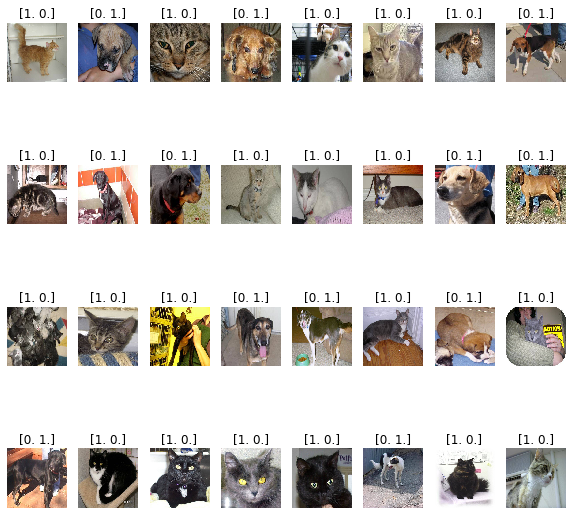

In [0]:
image_batch, label_batch = next(train_generator)
show_batch(image_batch, label_batch)

Create model

In [0]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Dropout(0.2),    

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Dropout(0.2),    

    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),        
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

Fit model

In [0]:
model_cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=MODEL_WEIGHTS_PATH,
    save_weights_only=True,
    verbose=1
    )

In [0]:
model.fit(train_generator, 
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    steps_per_epoch=steps_per_epoch,
    callbacks=[model_cp_callback]
    )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 625 steps, validate for 156 steps
Epoch 1/10
624/625 [============================>.] - ETA: 0s - loss: 0.7018 - accuracy: 0.5918
Epoch 00001: saving model to /content/drive/My Drive/Colab Notebooks/lab5_results/model.ckpt
625/625 [==============================] - 98s 157ms/step - loss: 0.7017 - accuracy: 0.5918 - val_loss: 0.6320 - val_accuracy: 0.6402
Epoch 2/10
624/625 [============================>.] - ETA: 0s - loss: 0.5963 - accuracy: 0.6837
Epoch 00002: saving model to /content/drive/My Drive/Colab Notebooks/lab5_results/model.ckpt
625/625 [==============================] - 91s 146ms/step - loss: 0.5963 - accuracy: 0.6838 - val_loss: 0.5877 - val_accuracy: 0.6929
Epoch 3/10
624/625 [============================>.] - ETA: 0s - loss: 0.5342 - accuracy: 0.7339
Epoch 00003: saving model to /content/drive/My Drive/Colab Notebooks/lab5_results/model.ckpt
625/625 [==============================] - 92s 147ms/step - loss: 0.534

Prapere testing data

In [0]:
test_filenames = os.listdir(TEST_DATASET_PATH)
test_df = pd.DataFrame({
    'filename': test_filenames
})

In [0]:
test_df.head()

,filename
0,9164.jpg
1,12157.jpg
2,10124.jpg
3,2451.jpg
4,5730.jpg


In [12]:
test_generator = image_generator.flow_from_dataframe(
    test_df, 
    TEST_DATASET_PATH, 
    x_col="filename",
    y_col=None,
    class_mode=None,
    target_size=(IMAGE_HEIGHT,IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 12500 validated image filenames.


Predict

In [0]:
model.load_weights(MODEL_WEIGHTS_PATH)

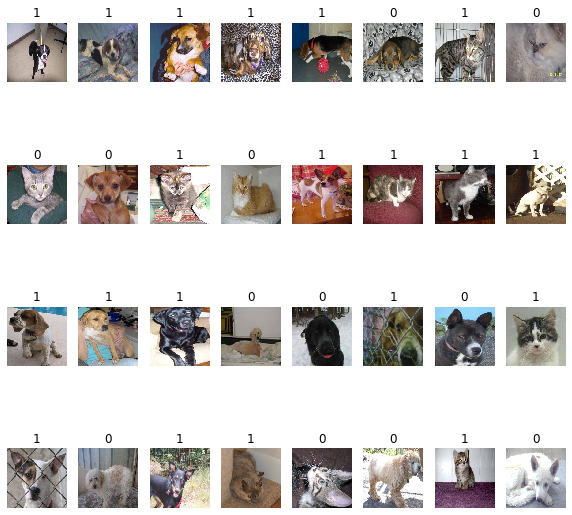

In [0]:
predict=model.predict(test_generator)
predicted_labels=np.argmax(predict, axis=-1)
image_batch = next(test_generator)
show_batch(image_batch, predicted_labels[:BATCH_SIZE])

Data augmentation

In [0]:
img_augmentation_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=45,
    shear_range=2,
    rescale=1./255
    )

In [0]:
train_augmentation_generator = img_augmentation_generator.flow_from_dataframe(
    train_df, 
    TRAIN_DATASET_PATH, 
    x_col='filename',
    y_col='label',
    target_size=(IMAGE_HEIGHT,IMAGE_WIDTH),
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

Found 20000 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


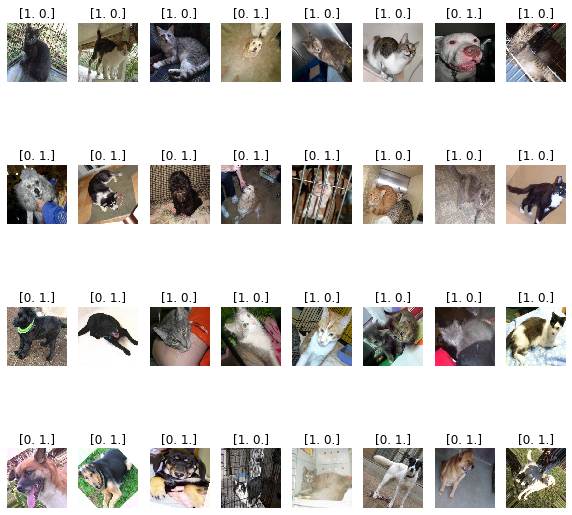

In [0]:
image_batch, label_batch = next(train_augmentation_generator)
show_batch(image_batch, label_batch)

Fit model with data augmentation

In [0]:
model.load_weights(MODEL_WEIGHTS_PATH)

In [0]:
model_cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="/content/drive/My Drive/Colab Notebooks/lab5_results/model_after_augmentation.ckpt",
    save_weights_only=True,
    verbose=1
    )

In [0]:
model.fit(train_augmentation_generator, 
    epochs=60,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    steps_per_epoch=steps_per_epoch,
    initial_epoch=10,
    callbacks=[model_cp_callback]
    )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 625 steps, validate for 156 steps
Epoch 11/60
624/625 [============================>.] - ETA: 0s - loss: 0.5751 - accuracy: 0.7154
Epoch 00011: saving model to /content/drive/My Drive/Colab Notebooks/lab5_results/model_after_augmentation.ckpt
625/625 [==============================] - 325s 521ms/step - loss: 0.5753 - accuracy: 0.7155 - val_loss: 0.5078 - val_accuracy: 0.7584
Epoch 12/60
624/625 [============================>.] - ETA: 0s - loss: 0.4872 - accuracy: 0.7702
Epoch 00012: saving model to /content/drive/My Drive/Colab Notebooks/lab5_results/model_after_augmentation.ckpt
625/625 [==============================] - 321s 514ms/step - loss: 0.4872 - accuracy: 0.7701 - val_loss: 0.4772 - val_accuracy: 0.7680
Epoch 13/60
624/625 [============================>.] - ETA: 0s - loss: 0.4518 - accuracy: 0.7932
Epoch 00013: saving model to /content/drive/My Drive/Colab Notebooks/lab5_results/model_after_augmentation.ckpt
625/625 [

Predict after training on augmentation data

In [0]:
model.load_weights("/content/drive/My Drive/Colab Notebooks/lab5_results/model_after_augmentation.ckpt")

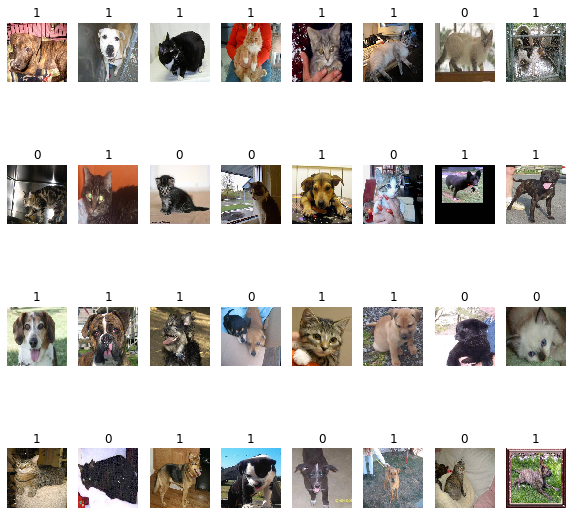

In [0]:
predict=model.predict(test_generator)
predicted_labels=np.argmax(predict, axis=-1)
image_batch = next(test_generator)
show_batch(image_batch, predicted_labels[:BATCH_SIZE])

Create pretrained VGG16

In [13]:
base_model=tf.keras.applications.VGG16(
    input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

58892288/58889256 [==============================] - 1s 0us/step


In [0]:
pretrained_model=tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),        
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='softmax')
])

pretrained_model.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [15]:
pretrained_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 8, 8, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               16777728  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026      
Total params: 31,493,442
Trainable params: 16,778,754
Non-trainable params: 14,714,688
_________________________________________________________________


Fit pretrained model

In [0]:
pretrained_model_cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath="/content/drive/My Drive/Colab Notebooks/lab5_results/pretrained_model.ckpt",
                                                 save_weights_only=True,
                                                 verbose=1)

In [19]:
pretrained_model.fit(train_generator, 
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    steps_per_epoch=steps_per_epoch,
    callbacks=[pretrained_model_cp_callback]
    )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 625 steps, validate for 156 steps
Epoch 1/10
624/625 [============================>.] - ETA: 0s - loss: 0.3429 - accuracy: 0.8948
Epoch 00001: saving model to /content/drive/My Drive/Colab Notebooks/lab5_results/pretrained_model.ckpt
625/625 [==============================] - 99s 159ms/step - loss: 0.3426 - accuracy: 0.8949 - val_loss: 0.1874 - val_accuracy: 0.9179
Epoch 2/10
624/625 [============================>.] - ETA: 0s - loss: 0.1483 - accuracy: 0.9396
Epoch 00002: saving model to /content/drive/My Drive/Colab Notebooks/lab5_results/pretrained_model.ckpt
625/625 [==============================] - 102s 164ms/step - loss: 0.1482 - accuracy: 0.9397 - val_loss: 0.1703 - val_accuracy: 0.9283
Epoch 3/10
624/625 [============================>.] - ETA: 0s - loss: 0.1165 - accuracy: 0.9534
Epoch 00003: saving model to /content/drive/My Drive/Colab Notebooks/lab5_results/pretrained_model.ckpt
625/625 [============================

Predict on pretrained model

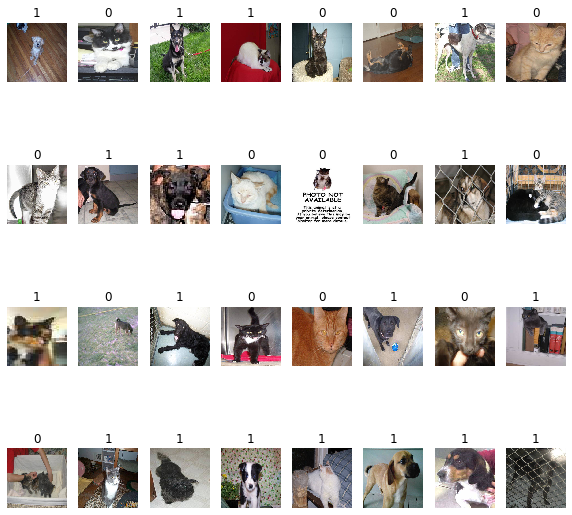

In [20]:
predict=pretrained_model.predict(test_generator)
predicted_labels=np.argmax(predict, axis=-1)
image_batch = next(test_generator)
show_batch(image_batch, predicted_labels[:BATCH_SIZE])